# Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing libraries

In [237]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#Importing zscore
from scipy.stats import zscore

#Importing preprocessing libraries
from sklearn.preprocessing import power_transform, LabelEncoder, StandardScaler

#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import Library to Balance Dataset.
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PowerTransformer
#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

#Import pickle
import pickle

In [150]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [151]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


# Analysing the raw dataset

In [152]:
df.shape

(1000, 40)

1000 row and 40 columns are there in this dataset

In [153]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [154]:
#separates features into categorical and numerical column
num_col = []
cat_col = []
for i in df.dtypes.index:
        if df.dtypes[i]=='object':
            cat_col.append(i)
        else:
            num_col.append(i)

In [155]:
num_col

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [156]:
cat_col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [157]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [158]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# OBSERVATION:
- There is no missing value present in numerical data.

- Minimum age is 19 and maximum age is 64.

- Policy number is the unique id that we will drop as it is not required.

- policy_deductable is a discrete data.

- Minimum annual premium is 433.33 and maximum annual premium is 2047.59

- Minimum Umbrella limit is showing negative numbers, we need to analyze that once again.

- number_of_vehicles_involved, bodily_injuries, witnesses features are containing discrete data.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [160]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_c39 has all null values and no other columns have any null values

In [161]:
df.drop('_c39',axis=1,inplace = True)

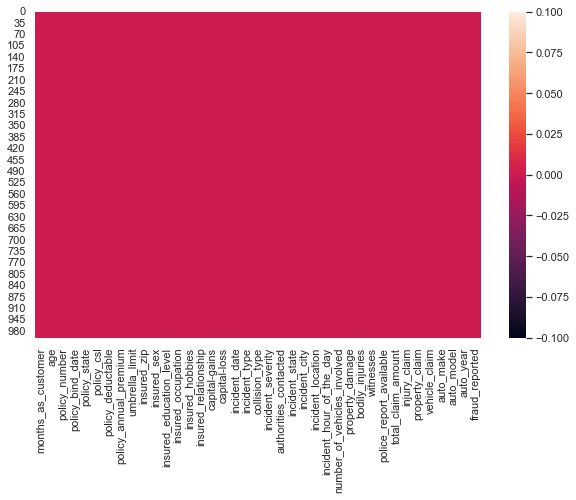

In [162]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull());

no null values are present

In [163]:
#Data type and their unique values
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts())
        print('#'*70)

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
######################################################################
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
######################################################################
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
######################################################################
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
######################################################################
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
######################################################################
machine-op-inspct    93
prof-specialty  

In [164]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

there are 3 columns where ? mark is identified which mislead or deviate the original purpose.so we will treat them separetely

In [165]:
#replacing "?" by NaN
df = df.replace('?',np.NaN)

In [166]:
df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

? is replaced by NaN.

In [167]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [168]:
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
NO     338
YES    302
Name: property_damage, dtype: int64
NO     343
YES    314
Name: police_report_available, dtype: int64


In [169]:
#replacing null with proper substitution
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [170]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [171]:
df.shape

(1000, 39)

All null values with '?' has also been replaced successfully.

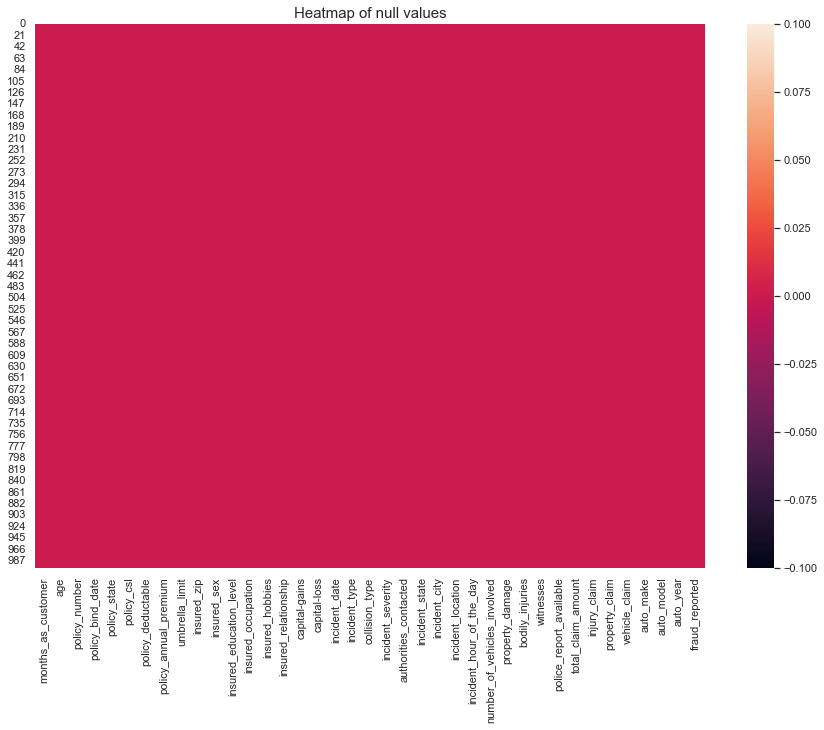

In [172]:
# ploting heatmap for null values check
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull());

# checking unique value

In [173]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [174]:
## Creating a new feature for vehicle age
df['vechicle_age']=2022-df['auto_year']

In [175]:
#DROPPING THE UNNECCESSARY COLUMNS
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [176]:
df.shape

(1000, 33)

In [177]:
## Selecting object data type
df_obj=df.select_dtypes(include='object')

In [178]:
for i in df_obj:
    print('***********************',i,'*******************************')
    print(df_obj[i].value_counts())

*********************** policy_csl *******************************
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
*********************** insured_sex *******************************
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
*********************** insured_education_level *******************************
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
*********************** insured_occupation *******************************
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
*******************

# NOW EXPLORATORY DATA ANALYSIS

# FOR TARGET VALUE

N    753
Y    247
Name: fraud_reported, dtype: int64


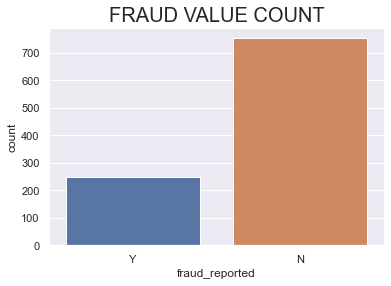

In [179]:
plt.title('FRAUD VALUE COUNT',fontsize=20)
sns.countplot(df['fraud_reported'],data=df);
print(df['fraud_reported'].value_counts())

32 % insurance claims reported as Yes in our dataset and 68 % as No

# For categorical columns

In [180]:
def val_count(df,col):
    plt.figure(figsize=(10,6))
    plt.title(col+' no of counts',fontsize=15)
    sns.countplot(df[col],hue='fraud_reported',data=df)
    plt.xticks(rotation=60)

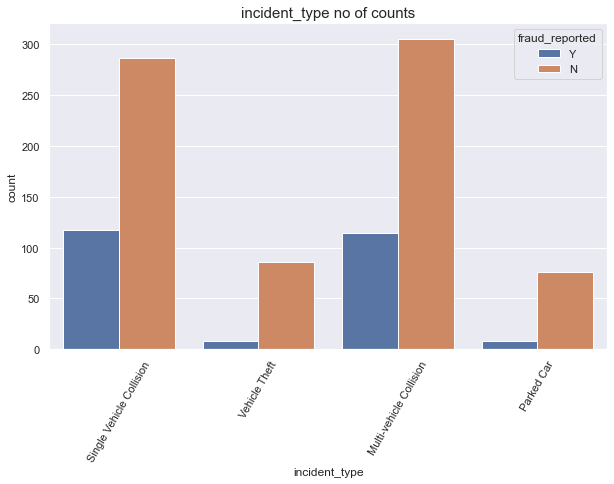

In [181]:
val_count(df,'incident_type')

multivechicle collision has more number of fraud reporting case

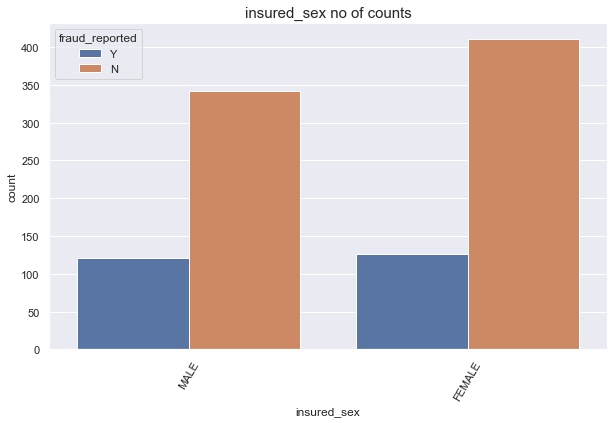

In [182]:
val_count(df,'insured_sex')

fraud reporting in case of female is more than male

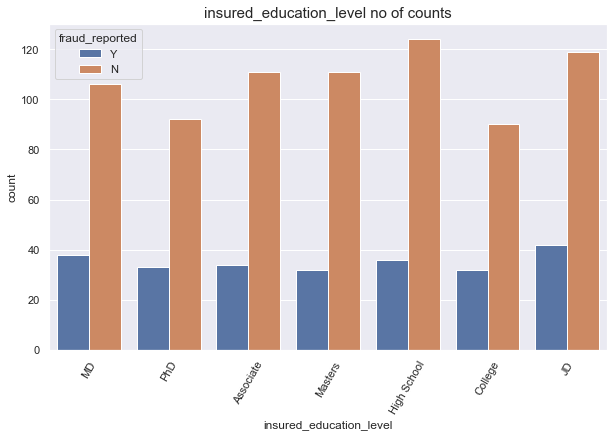

In [183]:
val_count(df,'insured_education_level')

more or less every educated section also involves in fraud claiming

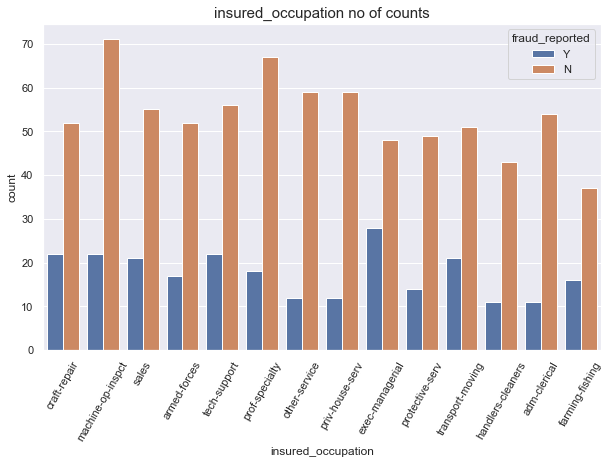

In [184]:
val_count(df,'insured_occupation')

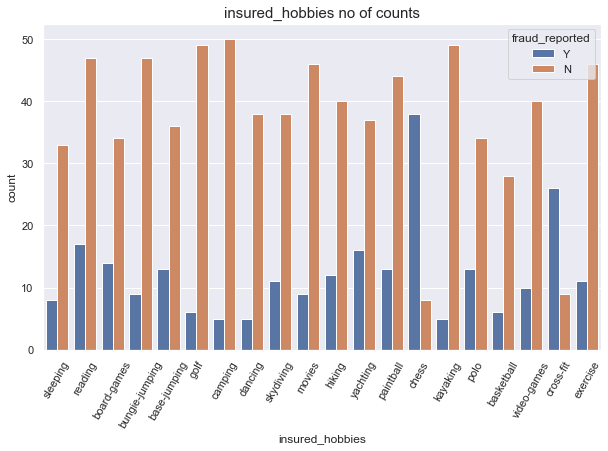

In [185]:
val_count(df,'insured_hobbies')

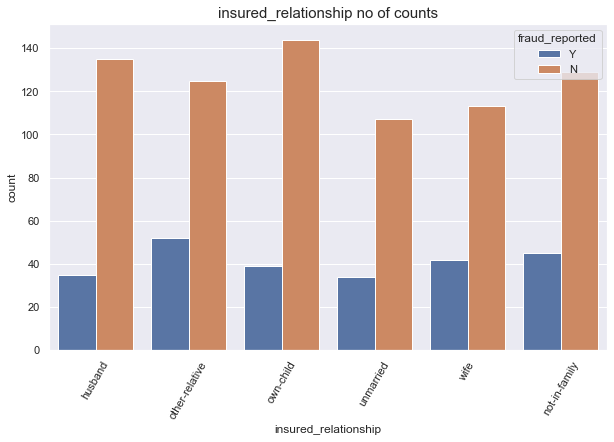

In [186]:
val_count(df,'insured_relationship')

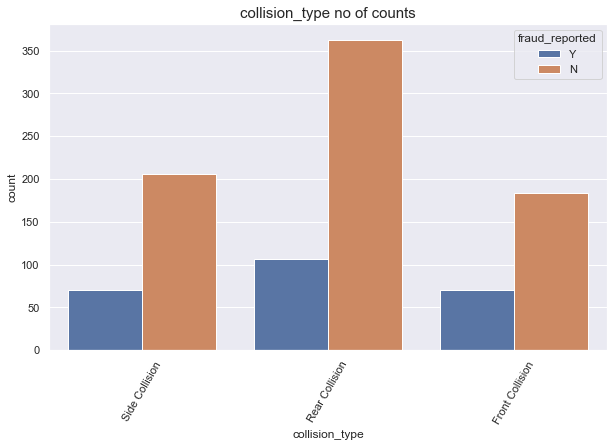

In [187]:
val_count(df,'collision_type')

None
None


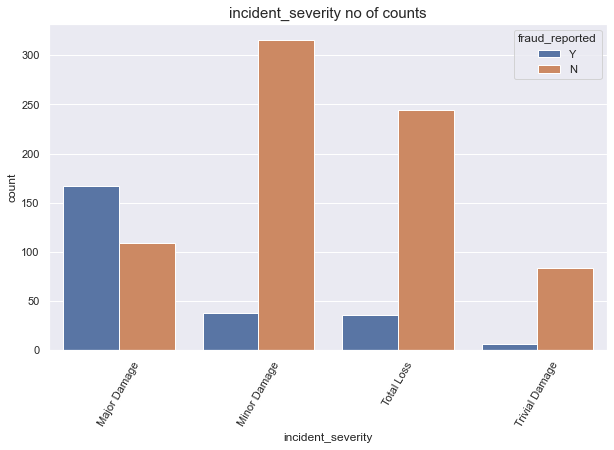

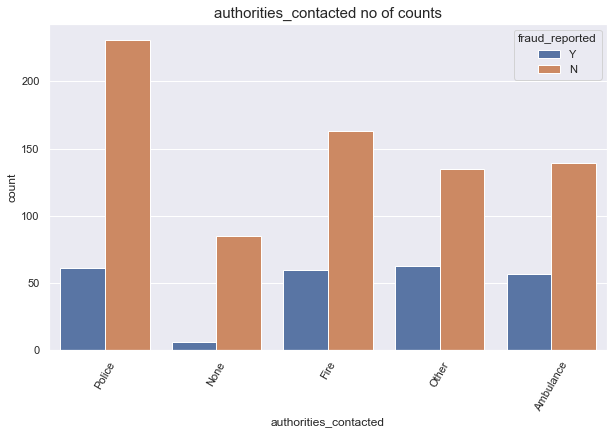

In [188]:
print(val_count(df,'incident_severity'))
print(val_count(df,'authorities_contacted'))

None
None


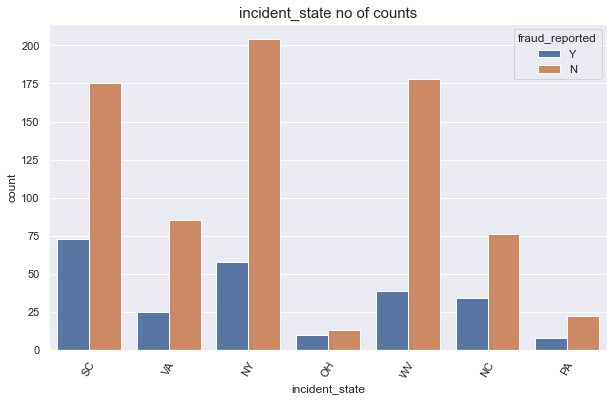

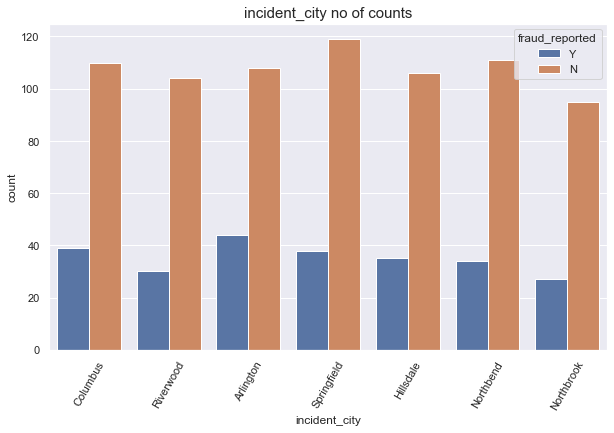

In [189]:
print(val_count(df,'incident_state'))
print(val_count(df,'incident_city'))

None
None
None
None


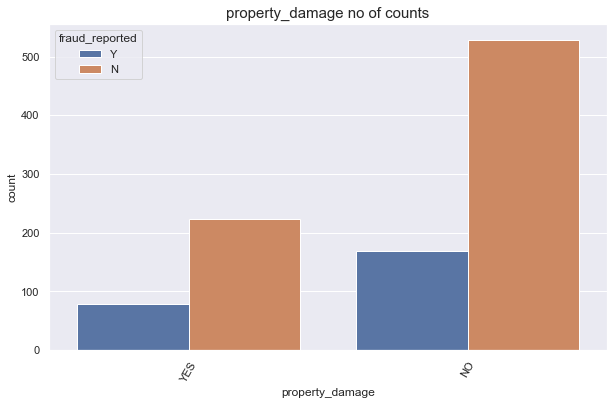

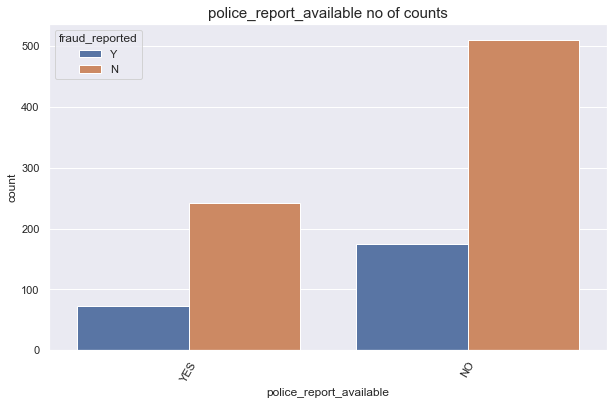

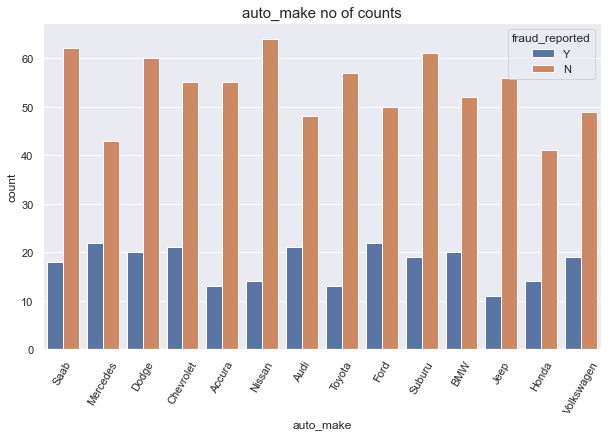

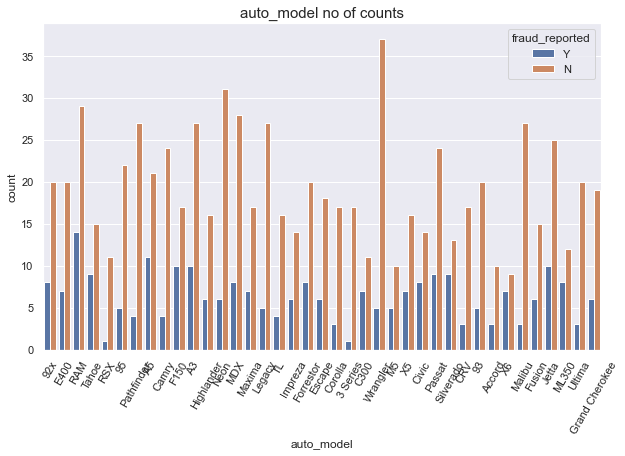

In [190]:
print(val_count(df,'property_damage'))
print(val_count(df,'police_report_available'))
print(val_count(df,'auto_make'))
print(val_count(df,'auto_model'))

# For numerical columns

In [191]:
df_num=df.select_dtypes(exclude='object')

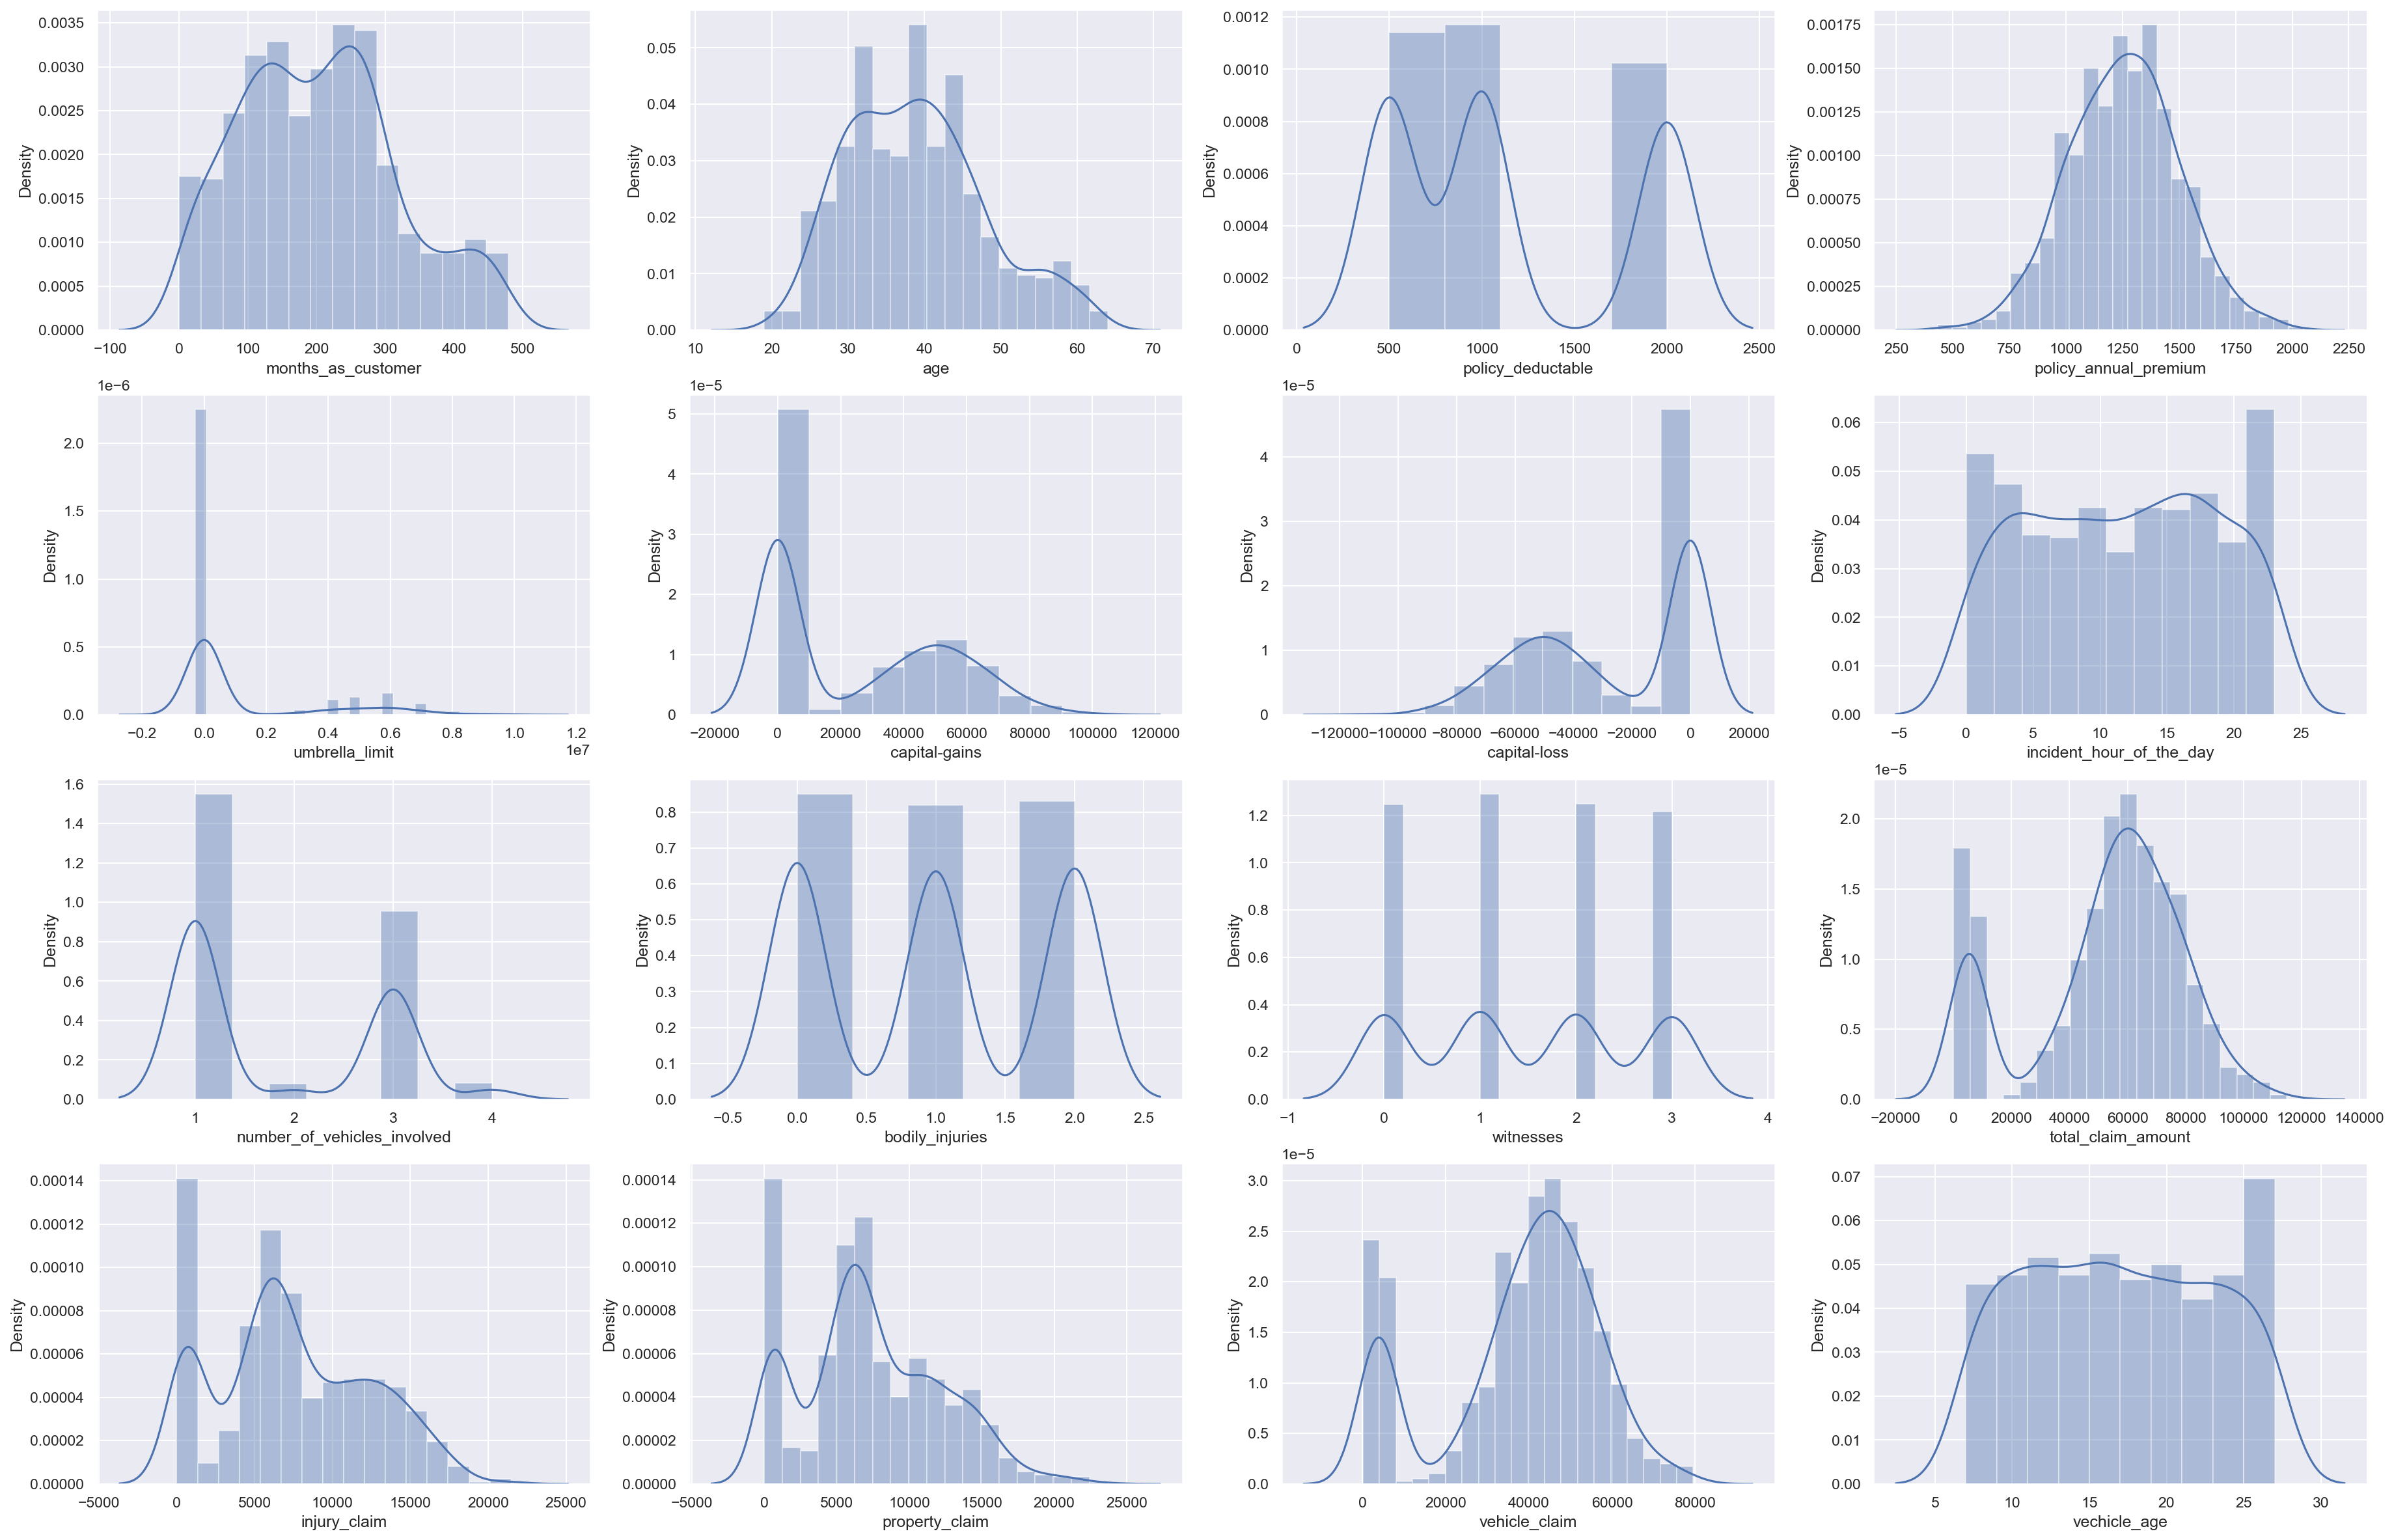

In [192]:
plt.figure(figsize=(30,20),dpi=150)
plot=1
for i in df_num:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

# now doing some multivariate analysis

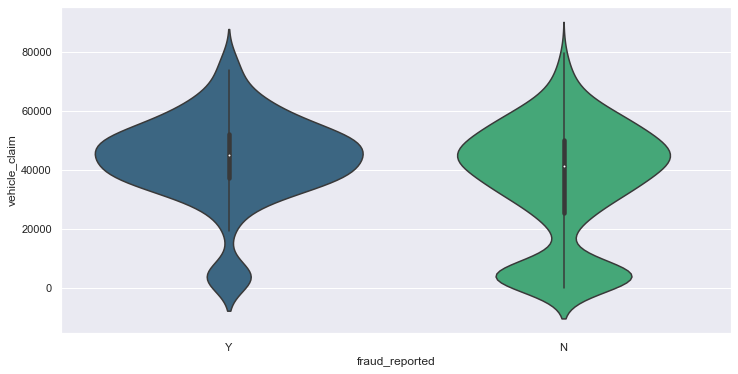

In [193]:
#Visualizing fraud reported by vehicle claim
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'vehicle_claim', data = df, palette = 'viridis')
plt.show()

vechicle claim 20k to 60k has highest density 

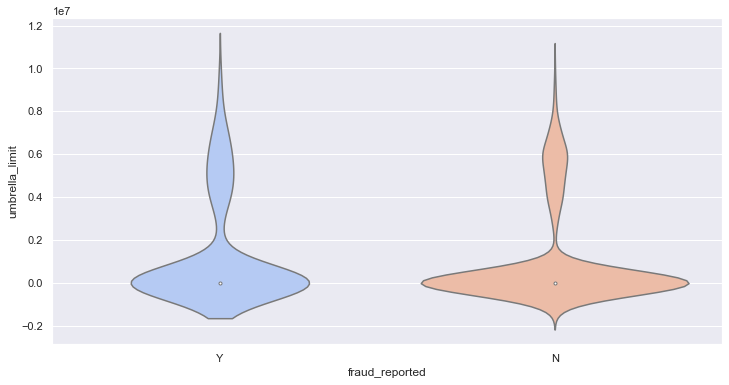

In [194]:
#Visualizing fraud reported by umbrella limit
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'umbrella_limit', data = df, palette = 'coolwarm')
plt.show()

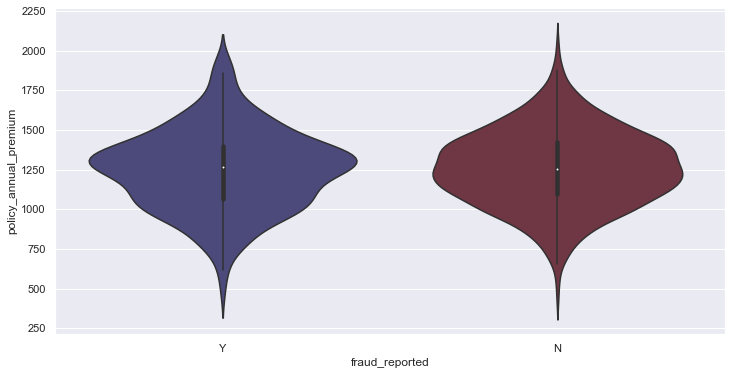

In [195]:
#Visualizing fraud reported by policy_annual_primium
plt.figure(figsize = (12,6))
sns.violinplot('fraud_reported', 'policy_annual_premium', data = df, palette = 'icefire')
plt.show()

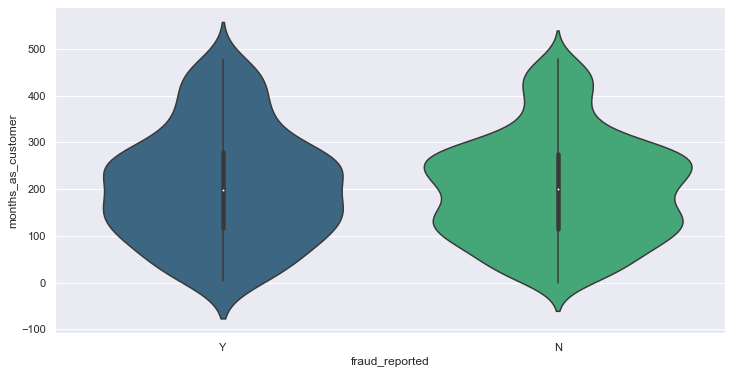

In [196]:
#Visualizing months_as_customer by fraud_reported
plt.figure(figsize = (12,6))
sns.set(color_codes = True)
sns.violinplot('fraud_reported', 'months_as_customer', data = df, palette = 'viridis')
plt.show()

density of fraud report is highest in the range 100 to 300.

# NOW checking the correlation

In [197]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,-0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,-0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,-0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,-0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,-0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,-0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,0.020527


<AxesSubplot:>

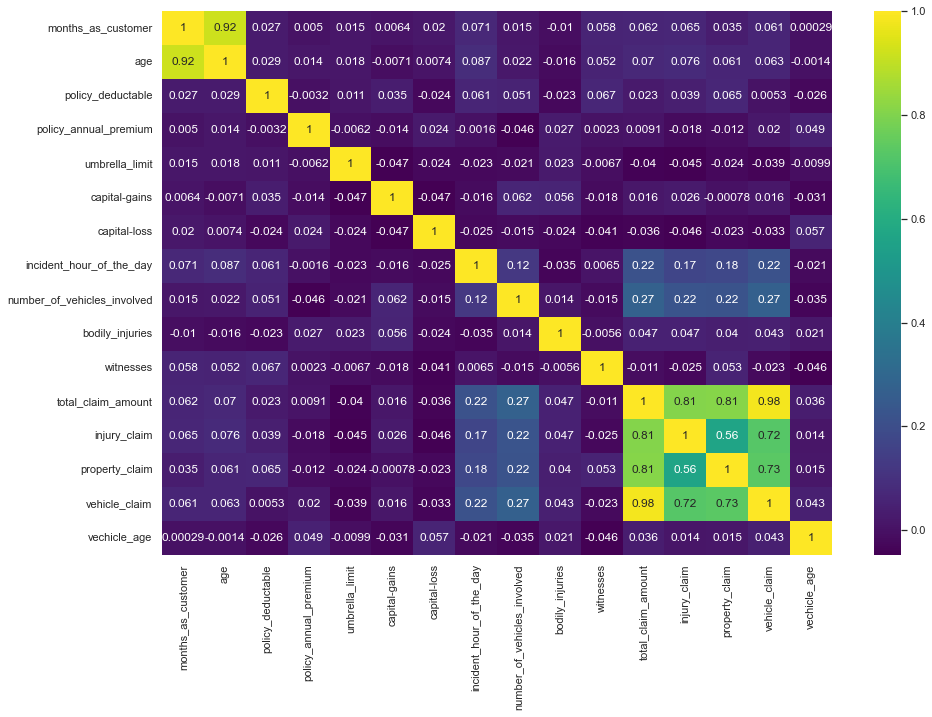

In [198]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

we observe some strong correlation among few features like total claim amount and vechicle claim,property claim and toatal_claim_amount

# checking skewness

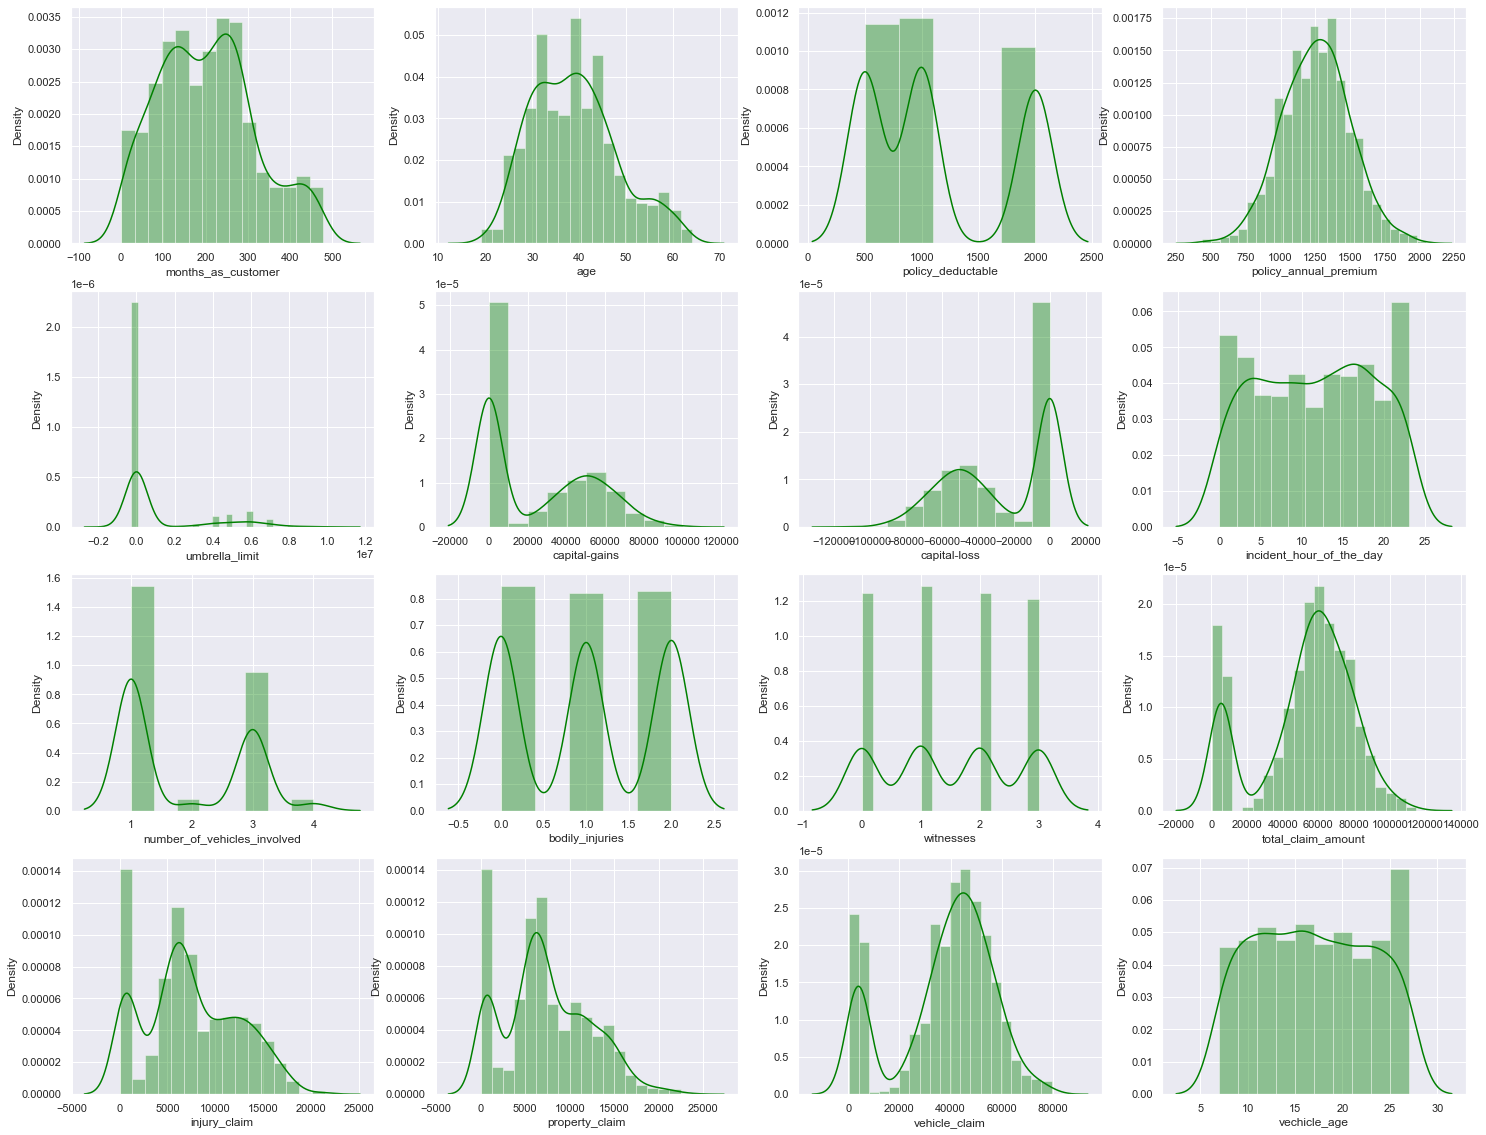

In [199]:
# Checking distribution of the dataset.
plt.figure(figsize = (25,20))
for i in enumerate(df.select_dtypes(include = ['int64', 'int32', 'float'])):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(df[i[1]], color = 'green')
    
plt.show()

data has somehow shows well distributed

# checking outliers using box plot

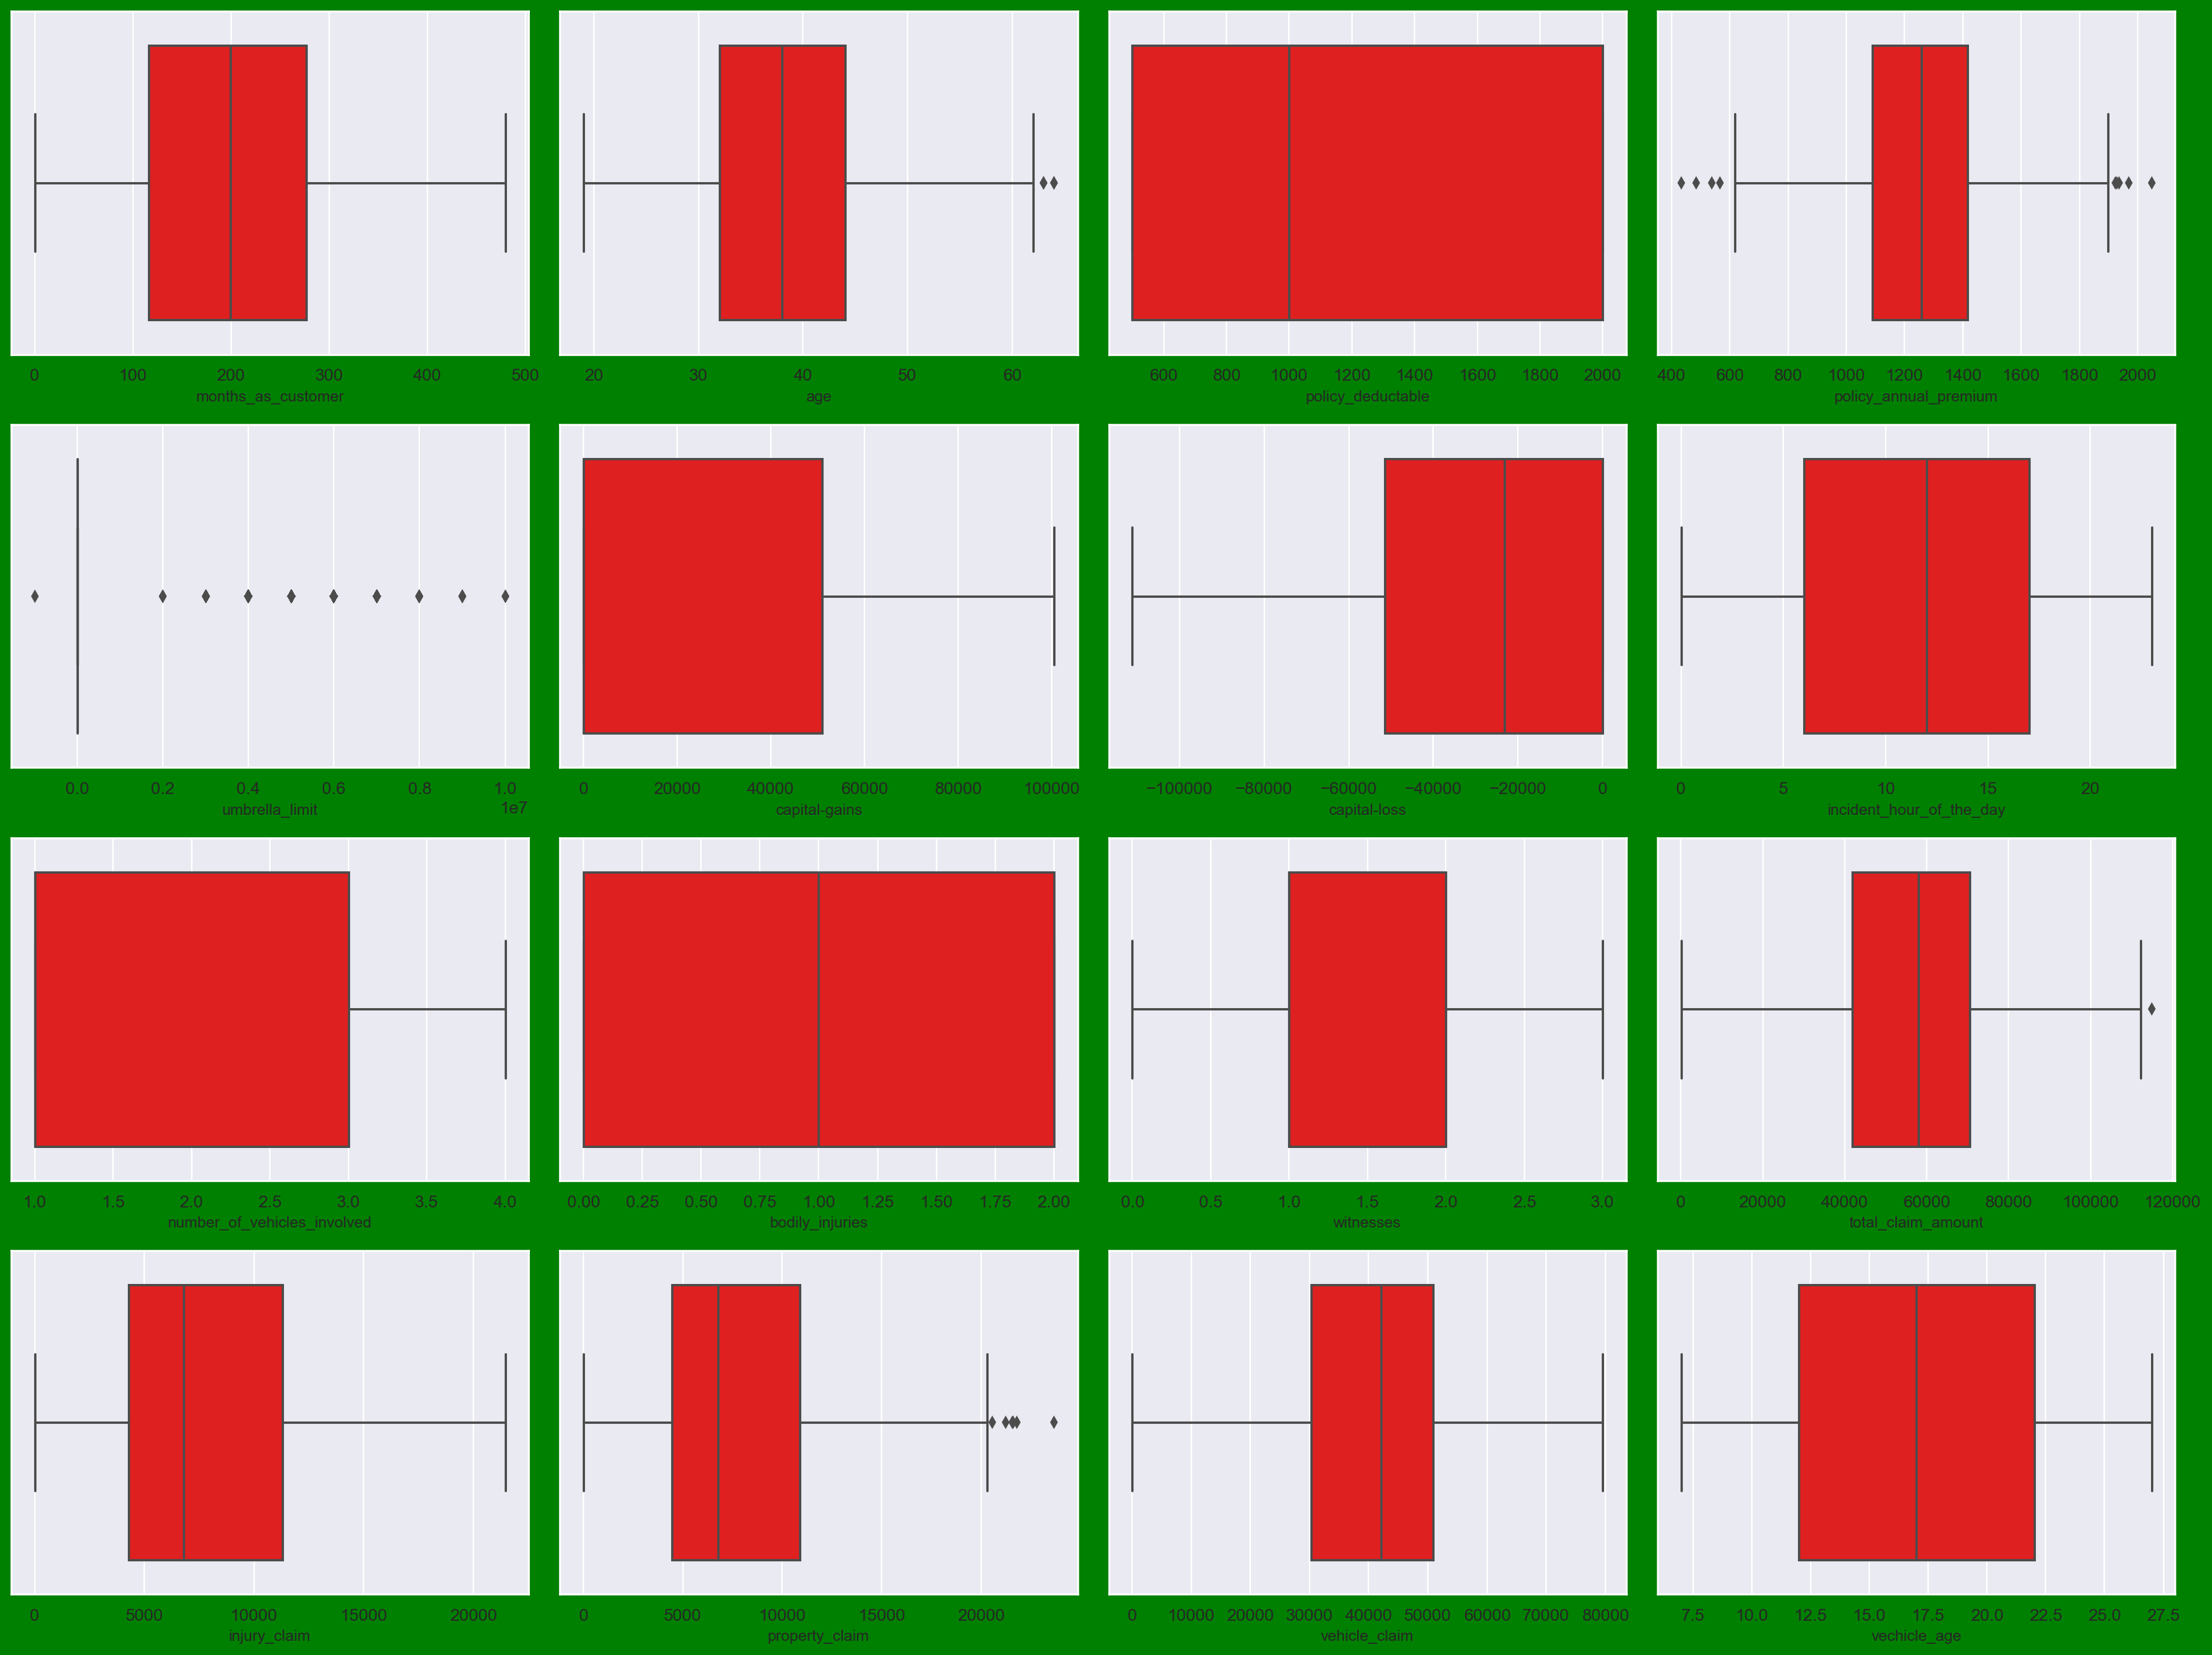

In [200]:
#checking for outliers
plt.figure(figsize=(20,15),dpi=150,facecolor='green')
plotnumber=1

for columns in df_num:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(df[columns],color='red')
    plt.xlabel(columns,fontsize=10)
    plotnumber += 1
    plt.tight_layout()

few outliers exists in column like property claim,total_claim-amount,umbrella_limit,policy_annual_premium,age.

In [201]:
#Checking skewness of the dataset
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

In [202]:
features = ['umbrella_limit', 'total_claim_amount', 'vehicle_claim']
scaler = PowerTransformer(method='yeo-johnson')
#scaling the features
df[features] = scaler.fit_transform(df[features].values)
df[features].head()

,umbrella_limit,total_claim_amount,vehicle_claim
0,-0.349113,0.715714,0.753697
1,1.357817,-1.776979,-1.786629
2,1.357817,-0.716825,-0.820881
3,1.644005,0.391426,0.677602
4,1.644005,-1.729802,-1.740038


In [203]:
#Chcking where data are >3
z = np.abs(zscore(df.select_dtypes(include = ['int32', 'int64', 'float'])))
print(np.where(z > 3))

(array([229, 248, 290, 500, 763, 807], dtype=int64), array([ 3,  3,  4, 13,  3,  6], dtype=int64))


In [204]:
#removing ouliers using zscore
df1 = df[(z < 3).all(axis = 1)]

In [205]:
df.shape

(1000, 33)

In [206]:
df1.shape

(994, 33)

In [207]:
#Printing data loss after removing skewness
data_loss = (1000 - 994)/1000 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  0.6


In [208]:
df1.skew()

months_as_customer             0.360794
age                            0.474776
policy_deductable              0.474379
policy_annual_premium          0.034076
umbrella_limit                 1.716339
capital-gains                  0.477833
capital-loss                  -0.378032
incident_hour_of_the_day      -0.039644
number_of_vehicles_involved    0.501381
bodily_injuries                0.011134
witnesses                      0.026138
total_claim_amount            -0.508428
injury_claim                   0.270831
property_claim                 0.359270
vehicle_claim                 -0.521183
vechicle_age                   0.050974
dtype: float64

skewness has been removed 

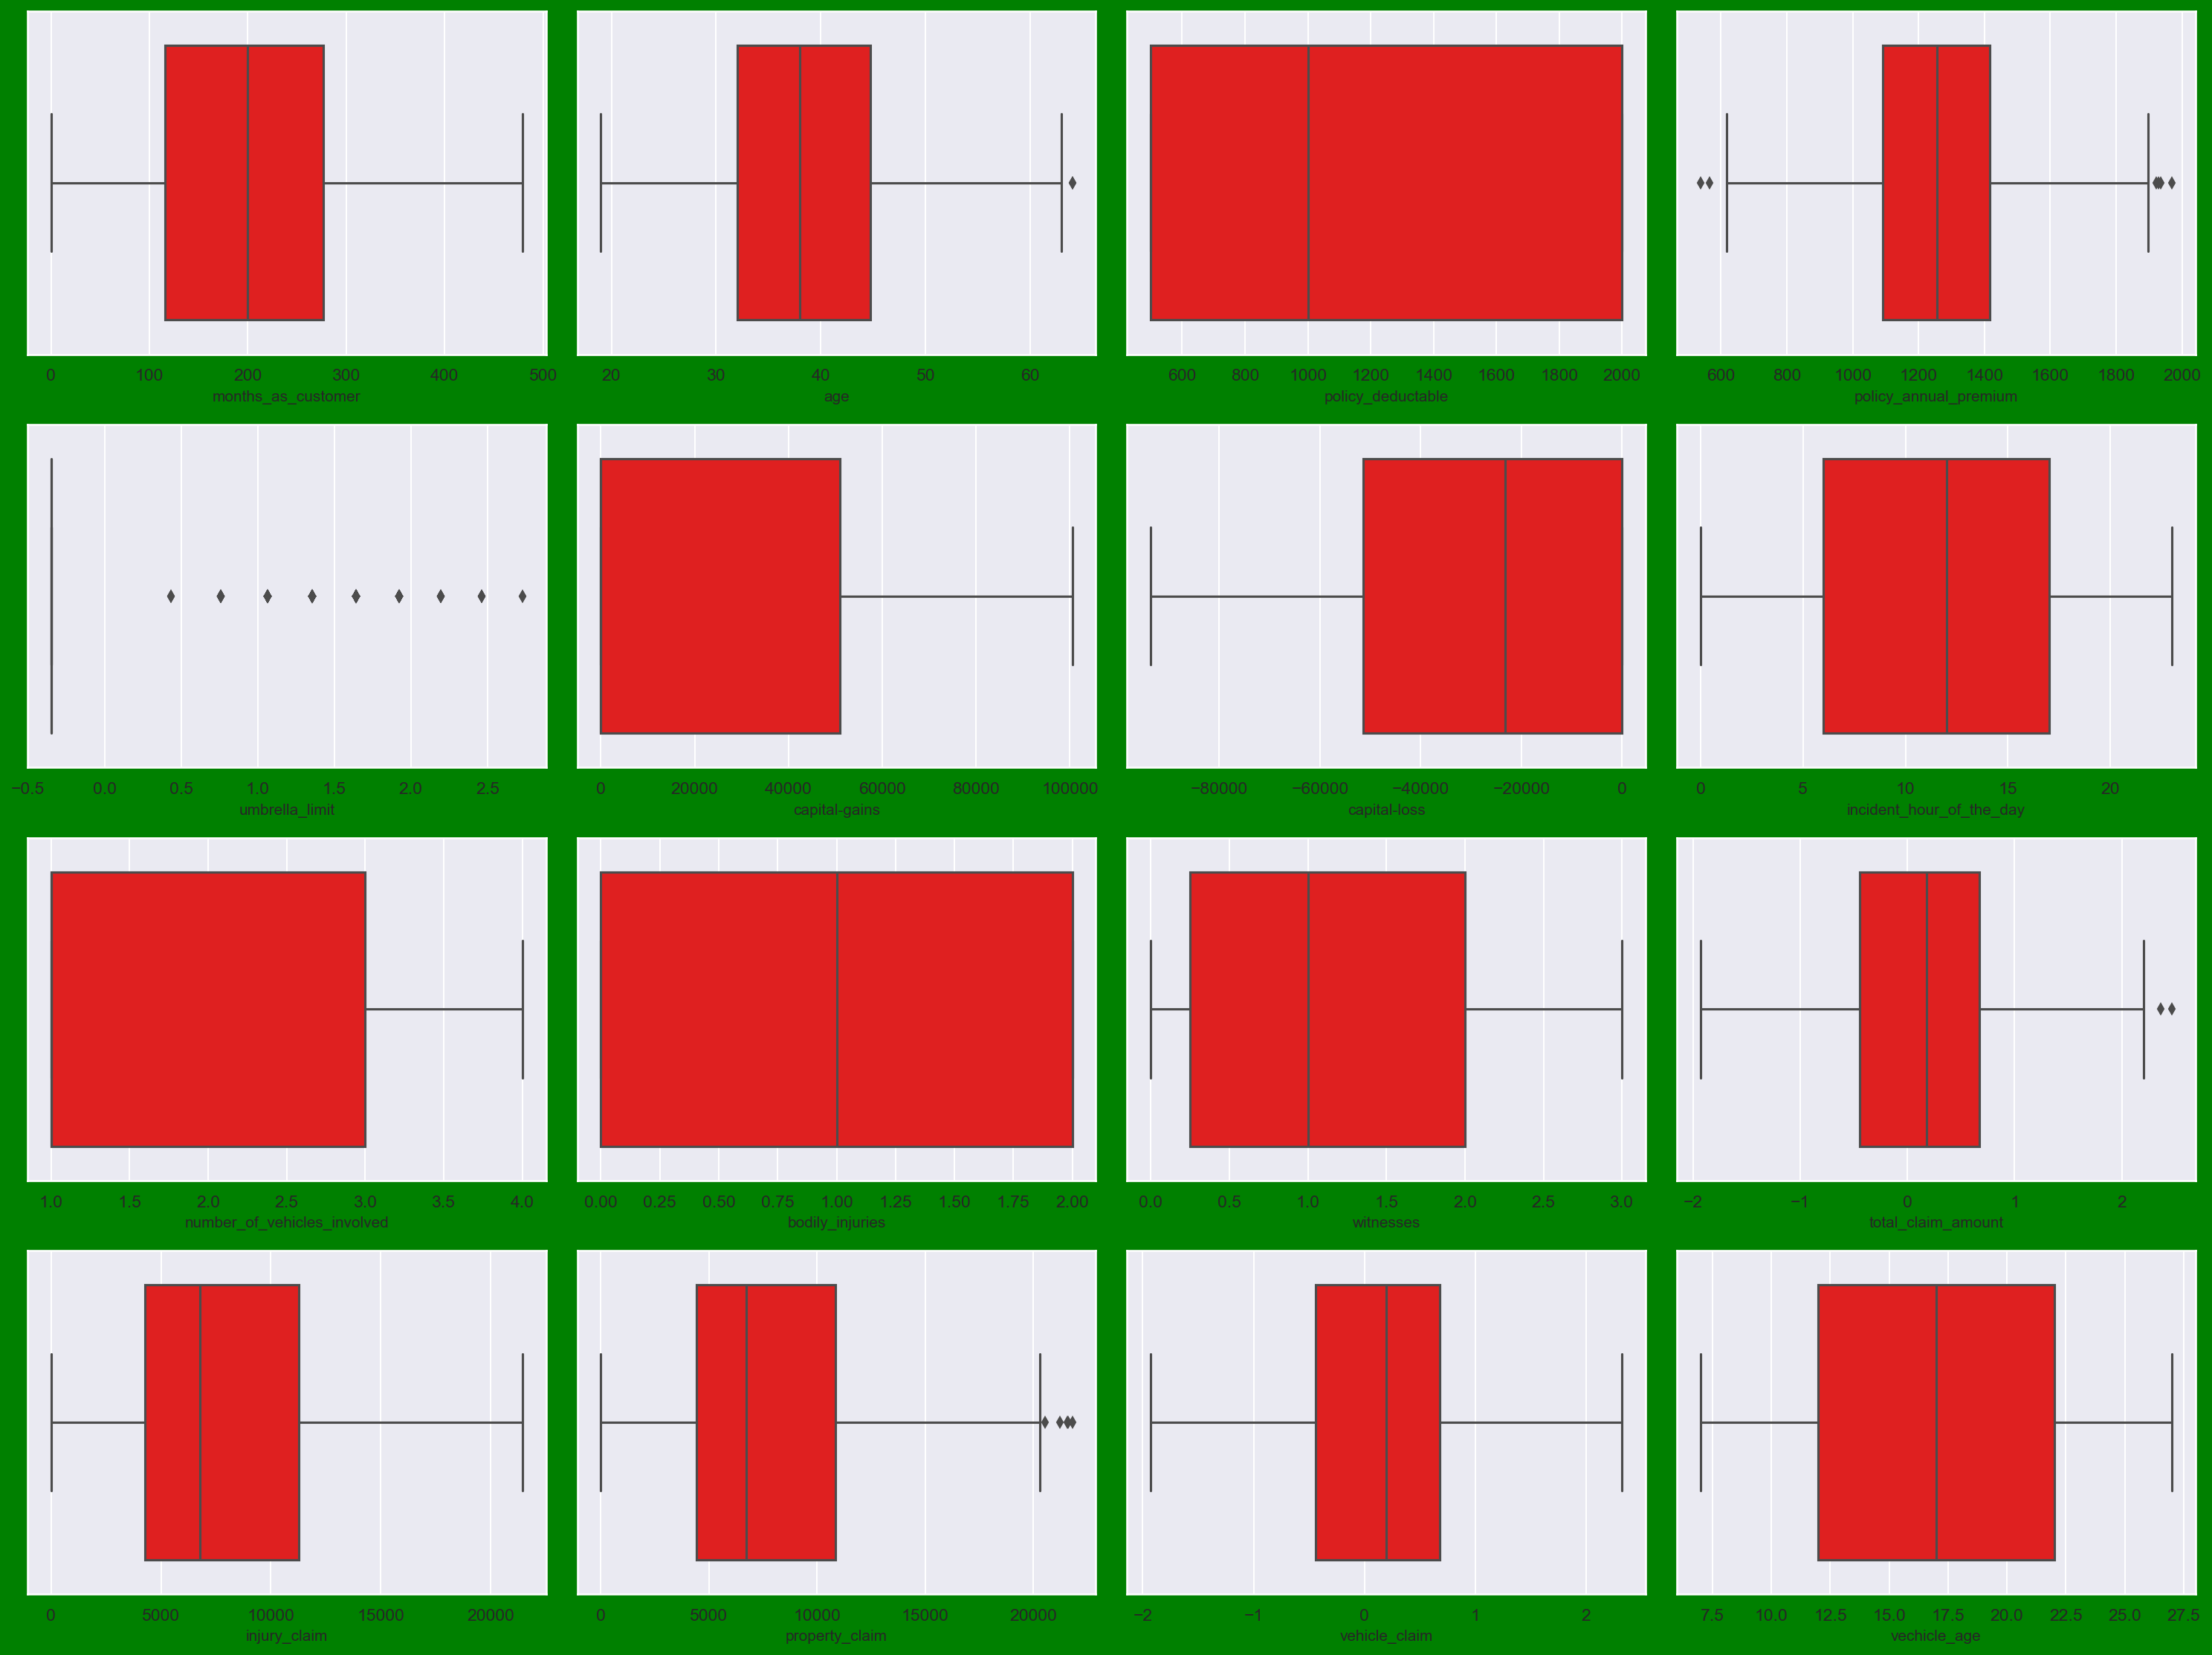

In [253]:
#checking for outliers
plt.figure(figsize=(20,15),dpi=150,facecolor='green')
plotnumber=1

for columns in df_num:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(df[columns],color='red')
    plt.xlabel(columns,fontsize=10)
    plotnumber += 1
    plt.tight_layout()

outliers has been removed significantly but still many exists but due to excessive data loss may result to bad result so we avoid to use IQR method

In [209]:
df = df1

# Applying label encoder

In [210]:
lab_enc = LabelEncoder()

for i in df_obj:
    df[i]=lab_enc.fit_transform(df[i])

In [211]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,-0.349113,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,0.715714,6510,13020,0.753697,10,1,1,18
1,228,42,1,2000,1197.22,1.357817,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,-1.776979,780,780,-1.786629,8,12,1,15
2,134,29,0,2000,1413.14,1.357817,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,-0.716825,7700,3850,-0.820881,4,30,0,15
3,256,41,1,2000,1415.74,1.644005,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,0.391426,6340,6340,0.677602,3,34,1,8
4,228,44,2,1000,1583.91,1.644005,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,-1.729802,1300,650,-1.740038,0,31,0,13


In [212]:
df.shape

(994, 33)

In [213]:
df.corr()['fraud_reported']

months_as_customer             0.021285
age                            0.012542
policy_csl                    -0.039479
policy_deductable              0.016075
policy_annual_premium         -0.009769
umbrella_limit                 0.058241
insured_sex                    0.032300
insured_education_level        0.010670
insured_occupation             0.003720
insured_hobbies               -0.048153
insured_relationship           0.019459
capital-gains                 -0.018337
capital-loss                  -0.013807
incident_type                 -0.048092
collision_type                -0.013443
incident_severity             -0.406594
authorities_contacted         -0.045410
incident_state                -0.053103
incident_city                 -0.038625
incident_hour_of_the_day       0.005097
number_of_vehicles_involved    0.048857
property_damage                0.017793
bodily_injuries                0.035558
witnesses                      0.051891
police_report_available       -0.031222


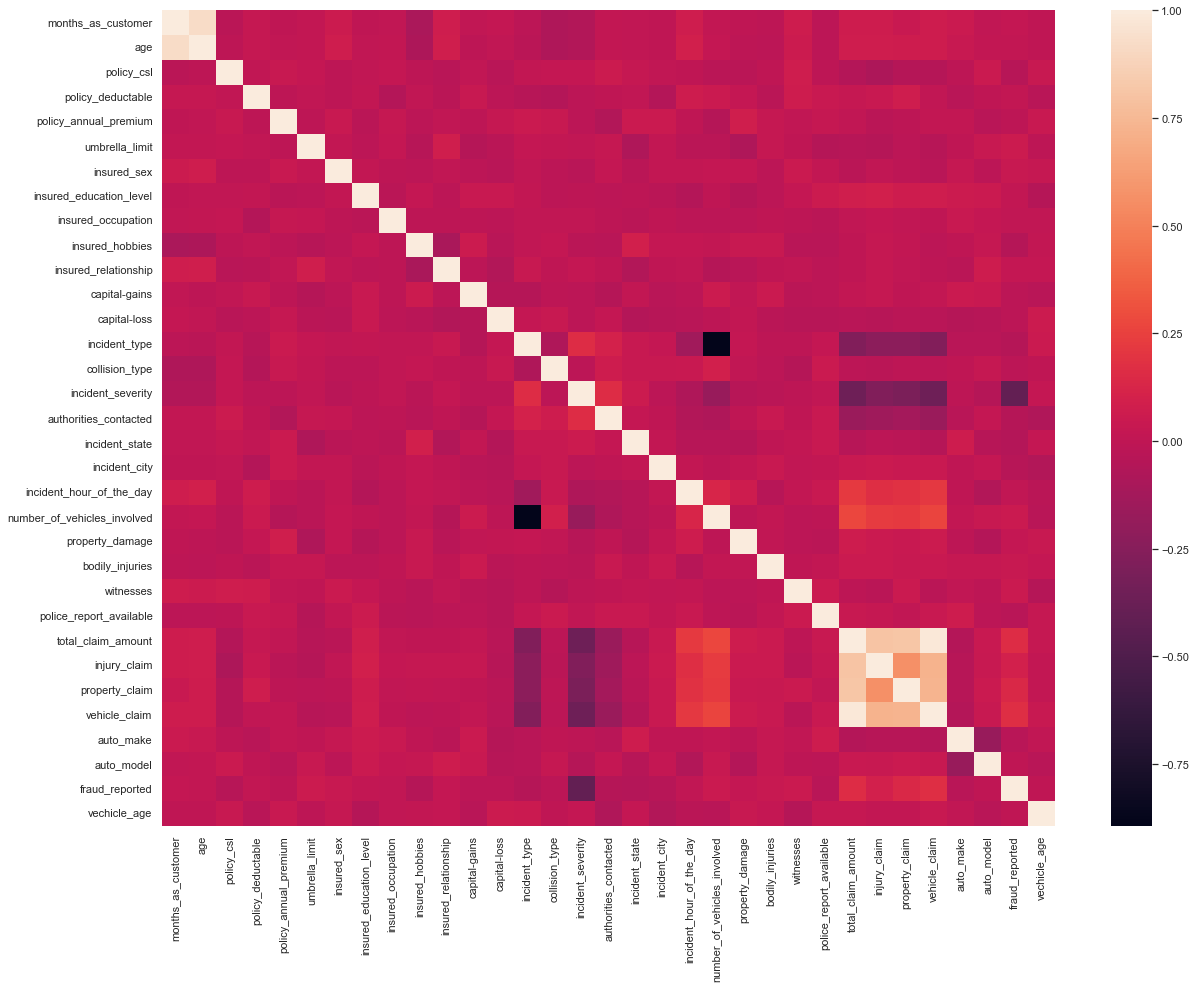

In [214]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=False);

# Spliting dataset into X and Y variable

In [215]:
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [216]:
x.shape

(994, 32)

In [217]:
y.shape

(994,)

# SCALING THE DATA

In [219]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.074398,0.986482,0.062518,-0.224473,0.621540,-0.487373,1.075259,0.529660,-1.160879,1.278936,-1.434527,1.012697,0.955524,0.765258,1.344922,-1.262252,1.195189,0.350238,-0.965446,-0.961038,-0.824603,1.517342,0.007375,0.467780,1.478478,0.720464,-0.186833,1.179406,0.757313,0.855268,-1.645807,0.185841
1,0.205226,0.330368,0.062518,1.410153,-0.250440,1.751847,1.075259,0.529660,-0.165482,0.927127,-0.244277,-0.901140,0.955524,1.689519,-0.029027,-0.198965,1.195189,0.813801,0.994030,-0.529049,-0.824603,-0.659047,-1.214335,-1.334442,-0.676371,-1.776479,-1.361151,-1.376063,-1.786019,0.358838,-0.658359,-0.313868
2,-0.611795,-1.091214,-1.180347,1.410153,0.647447,1.751847,-0.930008,1.555942,1.078764,-1.359632,0.350848,0.359192,0.955524,-1.083264,-0.029027,-0.198965,1.195189,-1.040453,-0.965446,-0.673045,1.138643,-0.659047,1.229084,1.368891,-0.676371,-0.714517,0.057048,-0.735108,-0.819128,-0.634022,0.957465,-0.313868
3,0.448594,0.221015,0.062518,1.410153,0.658259,2.127281,-0.930008,1.555942,-1.409728,-1.359632,0.945973,0.854707,-1.276417,0.765258,-1.402977,-1.262252,1.195189,-0.576890,-1.455315,-0.961038,-0.824603,-0.659047,0.007375,0.467780,-0.676371,0.395623,-0.221674,-0.215245,0.681128,-0.882237,1.316537,-1.479856
4,0.205226,0.549073,1.305384,-0.224473,1.357581,2.127281,1.075259,-1.522902,1.078764,-1.359632,0.945973,1.468715,-0.689817,1.689519,-0.029027,-0.198965,-0.111043,-1.040453,-1.455315,1.198907,-0.824603,-0.659047,-1.214335,-0.433331,-0.676371,-1.729221,-1.254582,-1.403205,-1.739372,-1.626882,1.047233,-0.647007


# Feature Importance

In [220]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [221]:
print(extra.feature_importances_)

[0.02889019 0.02901975 0.02309833 0.02224778 0.03020368 0.02229953
 0.01743425 0.02715012 0.03189776 0.04034255 0.02674384 0.02477897
 0.02715695 0.01711248 0.02439984 0.17524211 0.02638819 0.02878953
 0.02854919 0.02968351 0.01656553 0.0172298  0.02464224 0.02544201
 0.0188255  0.03103448 0.03000464 0.03401873 0.03418419 0.02983102
 0.02775462 0.02903871]


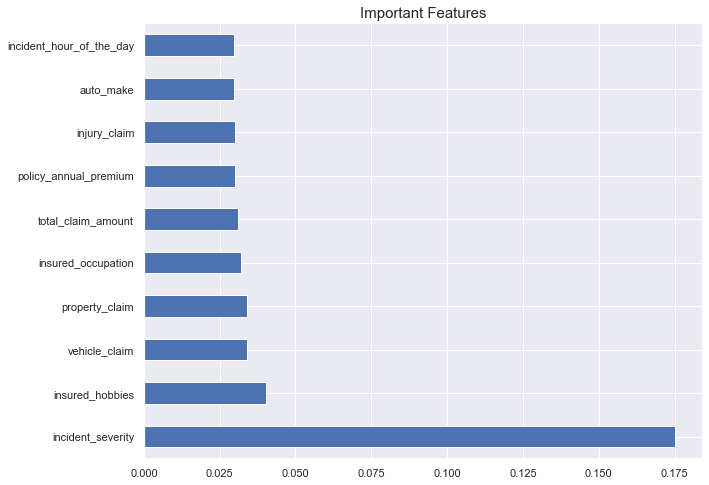

In [222]:
plt.figure(figsize=(10,8))
plt.title('Important Features',fontsize=15)
feature_importance=pd.Series(extra.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show();

# Model buildings

In [223]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve
from imblearn.combine import SMOTEENN

In [225]:
smot=SMOTEENN()
x_resample,y_resample=smot.fit_resample(x,y)
x_resample.head(2)

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,0.205226,0.549073,1.305384,-0.224473,1.357581,2.127281,1.075259,-1.522902,1.078764,-1.359632,0.945973,1.468715,-0.689817,1.689519,-0.029027,-0.198965,-0.111043,-1.040453,-1.455315,1.198907,-0.824603,-0.659047,-1.214335,-0.433331,-0.676371,-1.729221,-1.254582,-1.403205,-1.739372,-1.626882,1.047233,-0.647007
1,-0.385811,-0.216395,1.305384,-1.041787,0.485601,-0.487373,-0.930008,0.529660,-1.160879,1.630745,-0.244277,0.732623,-0.396517,0.765258,1.344922,0.864322,0.542073,-1.040453,0.504161,1.054911,-0.824603,1.517342,0.007375,-1.334442,-0.676371,0.772956,-0.162240,1.229514,0.811195,-1.626882,1.226769,-1.646425


In [226]:
y_resample

0      0
1      0
2      0
3      0
4      0
      ..
844    1
845    1
846    1
847    1
848    1
Name: fraud_reported, Length: 849, dtype: int32

In [227]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# 1. For Logistic Regression

max accuracy score corresponding to 72 is 92.94117647058823


cross validation score 77.77016395106845


Standard Deviation 3.016222786981991


F1 score 92.4731182795699


Training accuracy 91.4580265095729


Test Accuracy 87.6470588235294


Confusion Matrix [[ 20  16]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.56      0.66        36
           1       0.89      0.96      0.92       134

    accuracy                           0.88       170
   macro avg       0.84      0.76      0.79       170
weighted avg       0.87      0.88      0.87       170



Roc_auc Score 75.91210613598673





72

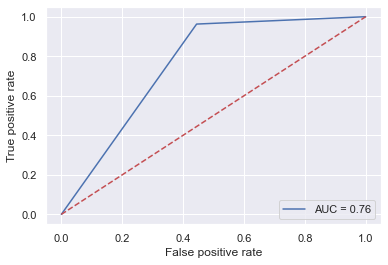

In [228]:
LR=LogisticRegression()
max_accuracy_score(LR,x,y)

# 2. For Gardient Boost

max accuracy score corresponding to 86 is 99.41176470588235


cross validation score 81.69280747170194


Standard Deviation 3.281513734426247


F1 score 96.62921348314607


Training accuracy 100.0


Test Accuracy 94.70588235294117


Confusion Matrix [[ 32   4]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.97      0.96      0.97       134

    accuracy                           0.95       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.95      0.95      0.95       170



Roc_auc Score 92.57877280265339





86

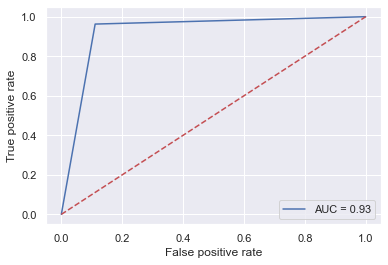

In [229]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

# 3. FOR RANDOM FOREST

max accuracy score corresponding to 61 is 97.6470588235294


cross validation score 77.7691487741739


Standard Deviation 1.7629230025068918


F1 score 94.8529411764706


Training accuracy 100.0


Test Accuracy 91.76470588235294


Confusion Matrix [[ 27   9]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.93      0.96      0.95       134

    accuracy                           0.92       170
   macro avg       0.89      0.86      0.87       170
weighted avg       0.92      0.92      0.92       170



Roc_auc Score 85.63432835820896





61

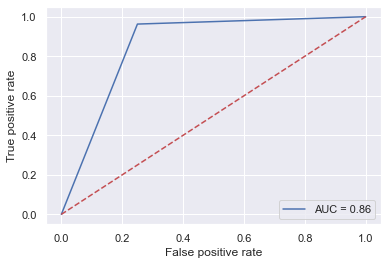

In [231]:
RFR = RandomForestClassifier()
max_accuracy_score(RFR,x,y)

# 4. For Ada boost classifier

max accuracy score corresponding to 71 is 97.6470588235294


cross validation score 80.28729506116441


Standard Deviation 4.080255471784114


F1 score 96.62921348314607


Training accuracy 99.70544918998527


Test Accuracy 94.70588235294117


Confusion Matrix [[ 32   4]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.97      0.96      0.97       134

    accuracy                           0.95       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.95      0.95      0.95       170



Roc_auc Score 92.57877280265339





71

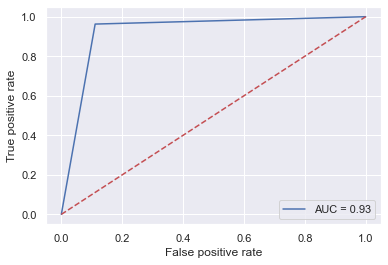

In [232]:
ada=AdaBoostClassifier()
max_accuracy_score(ada,x,y)

# 5. For KNN

max accuracy score corresponding to 72 is 92.3529411764706


cross validation score 71.73239937059031


Standard Deviation 2.427183717670141


F1 score 91.78082191780821


Training accuracy 93.51988217967599


Test Accuracy 85.88235294117646


Confusion Matrix [[ 12  24]
 [  0 134]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.33      0.50        36
           1       0.85      1.00      0.92       134

    accuracy                           0.86       170
   macro avg       0.92      0.67      0.71       170
weighted avg       0.88      0.86      0.83       170



Roc_auc Score 66.66666666666667





72

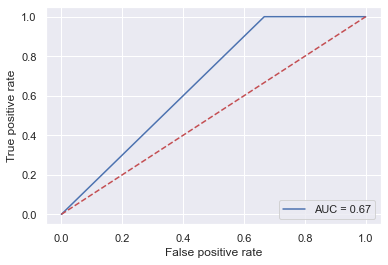

In [234]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# 6. For Decision Tree classifier

max accuracy score corresponding to 71 is 96.47058823529412


cross validation score 76.46160093396274


Standard Deviation 2.3566027890181602


F1 score 94.33962264150944


Training accuracy 100.0


Test Accuracy 91.17647058823529


Confusion Matrix [[ 30   6]
 [  9 125]]


Classification Report               precision    recall  f1-score   support

           0       0.77      0.83      0.80        36
           1       0.95      0.93      0.94       134

    accuracy                           0.91       170
   macro avg       0.86      0.88      0.87       170
weighted avg       0.92      0.91      0.91       170



Roc_auc Score 88.3084577114428





71

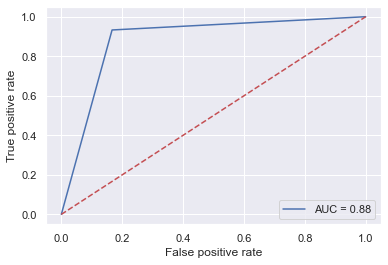

In [235]:
DT=DecisionTreeClassifier()
max_accuracy_score(DT,x,y)

# 7. For Naive Bayes

max accuracy score corresponding to 85 is 92.94117647058823


cross validation score 72.4409928430029


Standard Deviation 4.806320244206744


F1 score 90.9090909090909


Training accuracy 87.03976435935199


Test Accuracy 85.29411764705883


Confusion Matrix [[ 20  16]
 [  9 125]]


Classification Report               precision    recall  f1-score   support

           0       0.69      0.56      0.62        36
           1       0.89      0.93      0.91       134

    accuracy                           0.85       170
   macro avg       0.79      0.74      0.76       170
weighted avg       0.84      0.85      0.85       170



Roc_auc Score 74.4195688225539





85

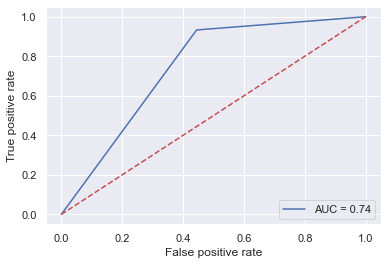

In [238]:
nb=GaussianNB()
max_accuracy_score(nb,x,y)

# 8. Bagging classifier

max accuracy score corresponding to 75 is 98.23529411764706


cross validation score 81.39028475711892


Standard Deviation 1.5128465687273034


F1 score 96.2121212121212


Training accuracy 99.70544918998527


Test Accuracy 94.11764705882352


Confusion Matrix [[ 33   3]
 [  7 127]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.98      0.95      0.96       134

    accuracy                           0.94       170
   macro avg       0.90      0.93      0.92       170
weighted avg       0.94      0.94      0.94       170



Roc_auc Score 93.22139303482587





75

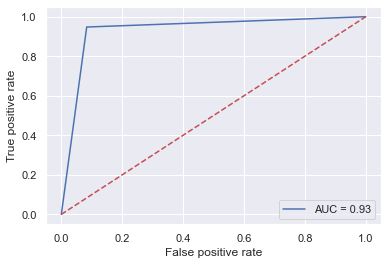

In [239]:
Bag_model = BaggingClassifier()
max_accuracy_score(Bag_model,x,y)

max accuracy score corresponding to 72 is 92.3529411764706


cross validation score 70.22384650525355


Standard Deviation 2.4506683533253732


F1 score 90.84249084249085


Training accuracy 88.65979381443299


Test Accuracy 85.29411764705883


Confusion Matrix [[ 21  15]
 [ 10 124]]


Classification Report               precision    recall  f1-score   support

           0       0.68      0.58      0.63        36
           1       0.89      0.93      0.91       134

    accuracy                           0.85       170
   macro avg       0.78      0.75      0.77       170
weighted avg       0.85      0.85      0.85       170



Roc_auc Score 75.43532338308458





72

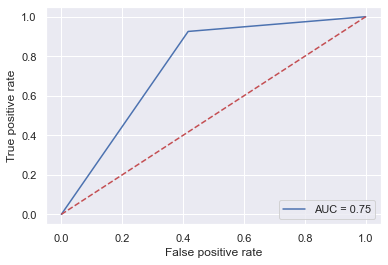

In [240]:
SGH_model = SGDClassifier()
max_accuracy_score(SGH_model,x,y)

# 9.SVC classifier

max accuracy score corresponding to 85 is 98.23529411764706


cross validation score 74.64900258870108


Standard Deviation 1.6829802065226027


F1 score 96.37681159420289


Training accuracy 99.70544918998527


Test Accuracy 94.11764705882352


Confusion Matrix [[ 27   9]
 [  1 133]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.75      0.84        36
           1       0.94      0.99      0.96       134

    accuracy                           0.94       170
   macro avg       0.95      0.87      0.90       170
weighted avg       0.94      0.94      0.94       170



Roc_auc Score 87.12686567164178





85

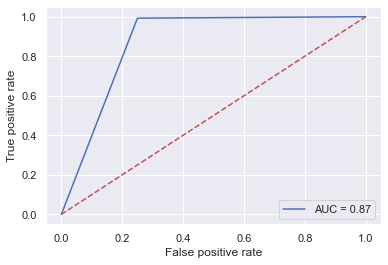

In [241]:
SV_model = SVC()
max_accuracy_score(SV_model,x,y)

# Next will check ROC AUC curve for the fitted model

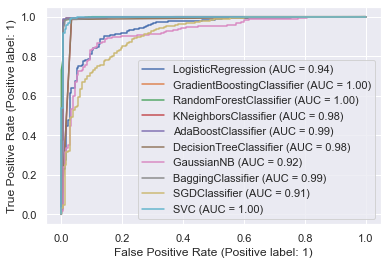

In [242]:
disp = plot_roc_curve(LR,x_resample,y_resample)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(RFR,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(ada,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(DT,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(nb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(Bag_model,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(SGH_model,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(SV_model,x_resample,y_resample,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

# observation:
- model covering 100% area = Gradient boost classifier,Random forest classifier, and svc.
- model covering almost 100% area is knn,adaboost,bagging.

The accuracy score of Gradient Boosting Classifier, ans AdaBoost has maximum but the difference of Accuracy Score and CV of Gradient Boosting Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of Gradient Boosting Classifier.

# Hyperparameter Tuning of Gradient Boosting Classifier.

In [244]:
X_resampled, y_resampled = smot.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=86,test_size=.20,stratify=y_resampled)

grid_param={
    "n_estimators":[12,13,15,16],
    "max_depth":range(4,7,2),
    "learning_rate":np.arange(0.1,1,0.1),
    "min_samples_split":range(4,8,2),
    "max_features":['auto', 'sqrt','log2']}

grid = GridSearchCV(gb,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.7000000000000001,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 15}

In [245]:
gbdt_clf = GradientBoostingClassifier(max_depth=4,min_samples_split=6,learning_rate=0.7,max_features ='auto',n_estimators=15)
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")
      
#####################TestScore##########################   
      
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")      
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    146.0  539.0       1.0      685.0         685.0
________________________________________________________________
 Confusion Matrix:
[[146   0]
 [  0 539]]


=======================Test Result===========================
Accuracy score:96.51%
_______________________________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.942857    0.970803  0.965116    0.956830      0.964791
recall      0.891892    0.985185  0.965116    0.938539      0.965116
f1-score    0.916667    0.977941  0.965116  

In [246]:
final_report = classification_report(y_test,pred)
print(final_report)

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.97      0.99      0.98       135

    accuracy                           0.97       172
   macro avg       0.96      0.94      0.95       172
weighted avg       0.96      0.97      0.96       172



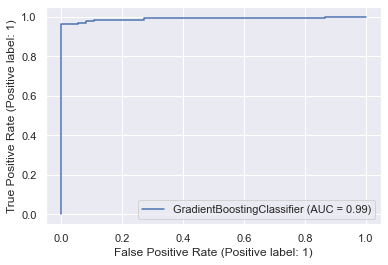

In [247]:
disp = plot_roc_curve(gbdt_clf,x_test,y_test)

# score has been improved significantly to 96%

# SAVING MY BEST MODEL

In [248]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(gbdt_clf, open('insurance_fraud', 'wb'))

In [249]:
#Loading saved model
loaded_model = pickle.load(open('insurance_fraud','rb'))

In [250]:
result = loaded_model.predict(x_test)
result

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [251]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
result = pd.DataFrame({'Actual insurance_fraud Reported': y_test, 'Predicted insurance_Fraud Reported': result})
result.head()

,Actual insurance_fraud Reported,Predicted insurance_Fraud Reported
194,1,1
808,1,1
137,0,1
605,1,1
76,0,0


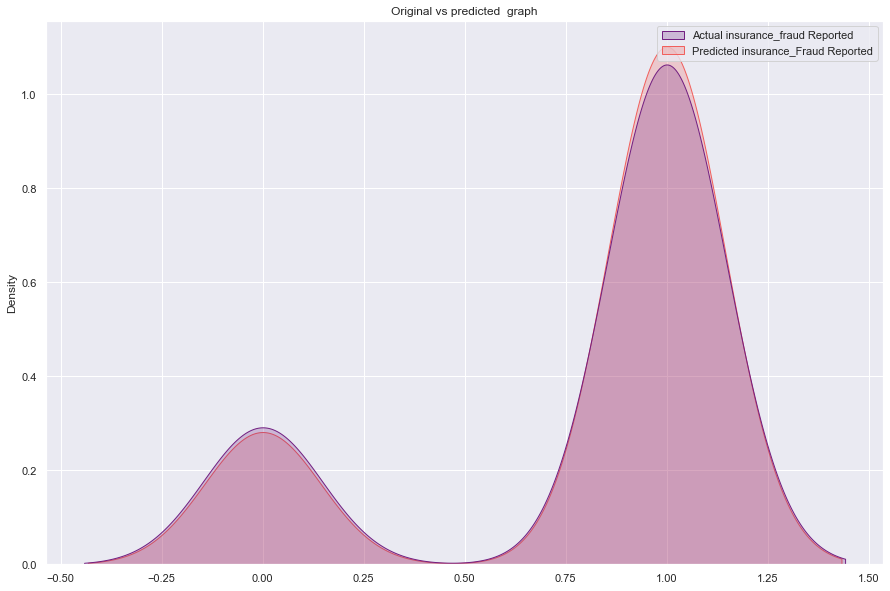

In [252]:
#Visulizing actual vs Predicted
plt.figure(figsize = (15,10))
sns.kdeplot(data = result, palette = 'magma', gridsize = 900, shade = True)
plt.title('Original vs predicted  graph')
plt.show()

# =========================taskaccompalished===================